In [181]:
import pandas as pd
import os

naics = pd.read_csv("NAICS Topics.csv")

finished = []
working_on = []
unfinish = []
all_work = []

for topic in naics['Definition']:
    file = f"./data/repo_by_topic/{topic}/data_{topic}.csv"
    file2 = f"./data/repo_by_topic/{topic}/topics_{topic}.csv"

    if not os.path.exists(file):
        unfinish.append(topic)
        continue
    
    length = len(pd.read_csv(file, on_bad_lines = "skip"))

    df = pd.read_csv(file, on_bad_lines = "skip")
    df = df.drop_duplicates(subset=['repo', 'user'])
    real_length = len(df)

    length2 = len(pd.read_csv(file2, on_bad_lines = "skip"))

    if abs(length - length2) < 100:
        finished.append((topic, length, real_length, length2))
    else: 
        working_on.append((topic, length, real_length, length2))
    all_work.append((topic, length, real_length, length2))

working_on.sort(key = lambda x: x[1])

print(f'finished {len(finished)}')
print(finished)
print(f'working on {len(working_on)}')
print(sum([x[1] for x in working_on]))
print(f'unfinish {len(unfinish)}')
print(unfinish)

print([i[0] for i in working_on][:15])
working_on

finished 6
[('Construction', 314, 313, 349), ('Wholesale Trade', 38, 32, 34), ('Retail Trade', 369, 369, 409), ('Management of Companies and Enterprises', 157, 137, 138), ('Administrative and Support and Waste Management and Remediation Services', 948, 944, 959), ('Public Administration', 21, 21, 22)]
working on 13
24535
unfinish 1
['Other Services (except Public Administration)']
['Mining, Quarrying, and Oil and Gas Extraction', 'Real Estate and Rental and Leasing', 'Utilities', 'Agriculture, Forestry, Fishing and Hunting', 'Transportation and Warehousing', 'Health Care and Social Assistance', 'Manufacturing', 'Professional, Scientific, and Technical Services', 'Accommodation and Food Services', 'Finance and Insurance', 'Arts, Entertainment, and Recreation', 'Educational Services', 'Information']


[('Mining, Quarrying, and Oil and Gas Extraction', 389, 208, 225),
 ('Real Estate and Rental and Leasing', 848, 821, 981),
 ('Utilities', 1503, 1453, 1660),
 ('Agriculture, Forestry, Fishing and Hunting', 1526, 1478, 1732),
 ('Transportation and Warehousing', 1823, 1804, 2255),
 ('Health Care and Social Assistance', 1857, 1834, 2356),
 ('Manufacturing', 1870, 1839, 2496),
 ('Professional, Scientific, and Technical Services', 2146, 2124, 2485),
 ('Accommodation and Food Services', 2271, 2004, 2701),
 ('Finance and Insurance', 2355, 1918, 5815),
 ('Arts, Entertainment, and Recreation', 2444, 2435, 5554),
 ('Educational Services', 2702, 2680, 4489),
 ('Information', 2801, 2799, 10371)]

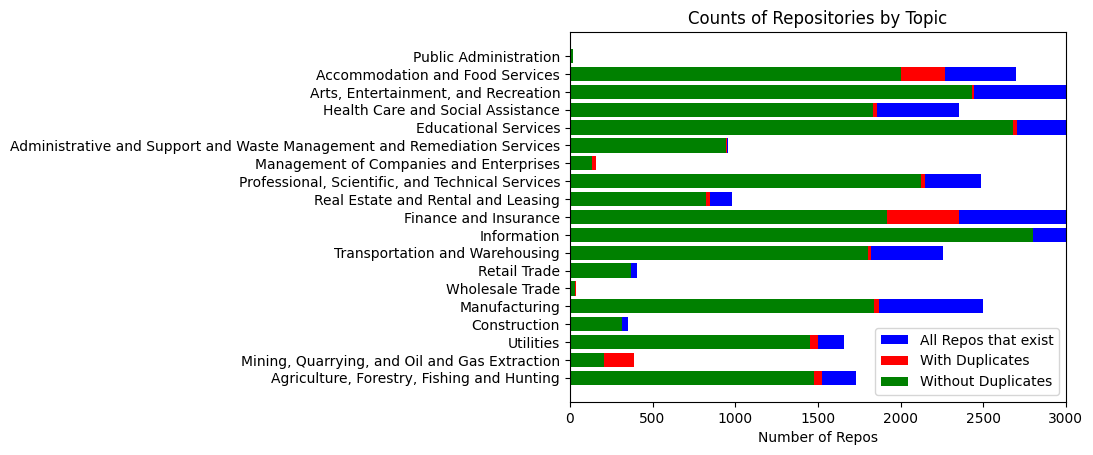

In [183]:
import matplotlib.pyplot as plt
import numpy as np

labels = [x[0] for x in all_work]
with_duplicates = [x[1] for x in all_work]
without_duplicates = [x[2] for x in all_work]
all_repos = [x[3] for x in all_work]

ind = np.arange(len(labels))
fig, ax = plt.subplots()

p3 = plt.barh(ind, all_repos, color='blue', label='All Repos that exist')
p1 = plt.barh(ind, with_duplicates, color='red', label='With Duplicates')
p2 = plt.barh(ind, without_duplicates, color='green', label='Without Duplicates')

# Describe the data
ax.set_xlabel('Number of Repos')
ax.set_title('Counts of Repositories by Topic')
plt.yticks(ind, labels)
plt.xticks(np.arange(0, max(all_repos) + 1, 500))
plt.xlim(0, 3000)
plt.legend()

plt.show()


In [76]:
import pandas as pd
import os

naics = pd.read_csv("NAICS Topics.csv")

for topic in naics['Definition']:
    file_path = f"./data/repo_by_topic/{topic}/data_{topic}.csv"
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, on_bad_lines="skip")
        df_deduplicated = df.drop_duplicates(subset=['repo', 'user'])
        
        df_deduplicated.to_csv(file_path, index=False)


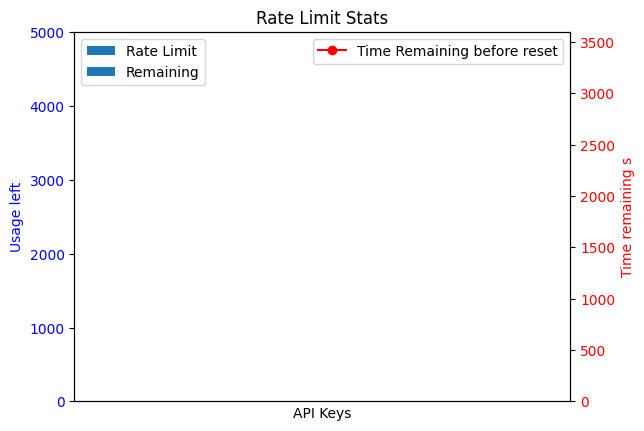

In [185]:
import requests
import matplotlib.pyplot as plt
import time
from local_secrets import API_KEYS 

labels = []
remaining_list = []
limit_list = []
time_remaining_list = []

for idx, key in enumerate(API_KEYS):
    headers = {
        "X-Github-Api-Version": "2022-11-28",
        "Authorization": f"Bearer {key}"
    }

    response = requests.get('https://api.github.com/rate_limit', headers=headers)

    if response.status_code == 200:
        rate_limit_info = response.headers
        limit = int(rate_limit_info.get('X-RateLimit-Limit', 'Unknown'))
        remaining = int(rate_limit_info.get('X-RateLimit-Remaining', 'Unknown'))
        reset_time = int(rate_limit_info.get('X-RateLimit-Reset', 'Unknown'))
        current_time = int(time.time())
        seconds_remaining = reset_time - current_time

        labels.append(f"Key {idx+1}")
        remaining_list.append(remaining)
        limit_list.append(limit)
        time_remaining_list.append(seconds_remaining)

fig, ax1 = plt.subplots()

x = range(len(labels))

# rate limit and remaining
ax1.bar(x, limit_list, width=0.4, label='Rate Limit', color='b', align='center')
ax1.bar(x, remaining_list, width=0.4, label='Remaining', color='g', align='edge')
ax1.set_xlabel('API Keys')
ax1.set_ylabel('Usage left', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation='vertical')
ax1.legend(loc='upper left')
ax1.set_ylim([0, 5000])

# time remaining
ax2 = ax1.twinx()
line, = ax2.plot(labels, time_remaining_list, label='Time Remaining before reset', color='r', marker='o')
ax2.set_ylabel('Time remaining s', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')
ax2.set_ylim([0, 3600])

# annotate
for i, txt in enumerate(time_remaining_list):
    ax2.annotate(txt, (labels[i], time_remaining_list[i]), textcoords="offset points", xytext=(0,10), ha='center', color='r')

plt.title('Rate Limit Stats')
plt.show()
